![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [2]:
# To resolve the memory leak warning on Windows
import os
os.environ['OMP_NUM_THREADS'] = '1'

# Importing required packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


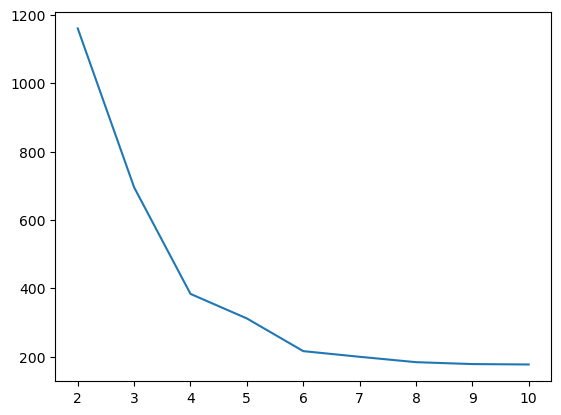

In [14]:
# Loading dataset and creating dummies

penguins_df = pd.read_csv("penguins.csv")
samples = pd.get_dummies(penguins_df)

# Preprocessing with StandardScaler()
scaler = StandardScaler()
scaler.fit(samples)
samples_scaled = scaler.transform(samples)


# Finding inertia for a range of clusters & plotting
inertia = []
clusters = []
for i in range(2,11):
    km = KMeans(n_clusters = i, n_init = 'auto') #n_init used to suppress FutureWarning
    km.fit(samples_scaled)
    labels = km.predict(samples_scaled)
    clusters.append(i)
    inertia.append(km.inertia_)
plt.plot(clusters, inertia)


In [16]:
#Fitting and predicting labels
km = KMeans(n_clusters = 6, n_init = 'auto')
km.fit(samples_scaled)
labels = km.predict(samples_scaled)

#Finding the mean of characteristics grouped by penguin labels
samples_n = penguins_df.drop("sex", axis = 1)
samples_n["labels"] = labels
stat_penguins = samples_n.groupby("labels").agg("mean")
print(stat_penguins)

        culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
labels                                                                   
0              40.315714        19.011429         192.242857  4034.642857
1              45.563793        14.237931         212.706897  4679.741379
2              51.268966        16.093103         226.000000  5650.000000
3              40.217757        17.611215         189.046729  3419.158879
4              47.846875        15.378125         217.500000  5335.156250
5              50.805556        19.305556         199.666667  3952.083333
